# Programming Assignment 3
## "Paint by numbers"
<!-- Licensed under (CC BY 4.0) Gert Herold, 2021 -->

Insert the names of the group members here:
  
  * George Kouris
  * Xinchen Yao

For a better understanding of the flow field around a circular cylinder with a diameter of 7.5 mm, [CFD simulations](https://en.wikipedia.org/wiki/Computational_fluid_dynamics) were done.
The calculations were done on an irregular 2D grid, which cuts through the cylinder, so that it is visible as a circle.
The results for one instant in time were exported as [CSV file](https://en.wikipedia.org/wiki/Comma-separated_values).

**All the programming for this assignment can be done without any if-statements or loops! It's okay if you need them for your initial solution, but try to come up with a variant that doesn't involve these structures and instead makes use of the numpy features.**

### 1. Grid information

**1.1) Load the data from the file `U_xyplane.csv` and unpack the content of the columns into new variables (1D-arrays) `u,v,w,x,y,z`. For how many points do we have data?**

_Note: "Unpacking" an array `A` that has 2 rows is possible like this: `a,b = A`. All values are given in SI units (m and m/s)._

In [48]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle
import csv 

arr = np.genfromtxt("U_xyplane.csv", delimiter=",")
u=arr[1:,0]
v=arr[1:,1]
w=arr[1:,2]
x=arr[1:,3]
y=arr[1:,4]
z=arr[1:,5]
print("We have data for", u.size,"points.")

We have data for 35267 points.


To get an idea of the setup, it would be nice to have a quick overview of the simulation area including the "cylinder circle".

**1.2) Determine the minimum and maximum x and y values and draw a rectangle that covers the area and surrounds a circle positioned at (x,y)=(0.06 m, 0.15 m) with a diameter of 7.5 mm.**

  * Write a function that gets the draws an unfilled rectangle using the [_plot()_] command.

Adding a circle to an existing figure is possible e.g. by this:
```python
    plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
```

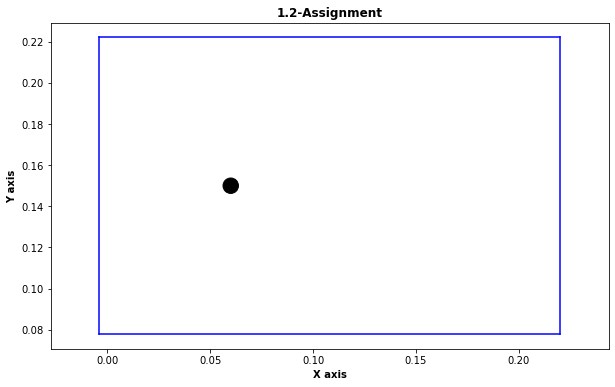

In [51]:
import matplotlib.pyplot as plt

def rectangle(xmin,xmax,ymin,ymax):
    plt.plot([xmin,xmin],[ymin,ymax],color='b')
    plt.plot([xmin,xmax],[ymin,ymin],color='b')
    plt.plot([xmin,xmax],[ymax,ymax],color='b')
    plt.plot([xmax,xmax],[ymin,ymax],color='b')
    
xmin=np.amin(x)    
ymin=np.amin(y)
xmax=np.amax(x)    
ymax=np.amax(y)

plt.figure(1,(10,6))

rectangle(xmin,xmax,ymin,ymax)

x_center=0.06
y_center=0.15
radius=7.5/2000
plt.gca().add_patch(Circle((x_center, y_center), radius, color='k'))
plt.title('1.2-Assignment',fontweight ="bold")
plt.xlabel('X axis',fontweight ="bold")
plt.ylabel('Y axis',fontweight ="bold")
plt.axis('equal')
plt.show()

Before looking at the data itself, lets have a look at the structure of the grid.

**1.3) Visualize the grid points in a 20x13-inch plot using `'.'`-markers with a size of 0.5.**

  * Select a sub-area of this grid that contains only the points with $5.9\,$cm $< x < 6.1\,$cm and $y > 15\,$cm. 
  * How many grid points lie in this area?
  * Add the corresponding grid points in a different color to the original plot.

_Note: For combining multiple boolean expressions in arrays, the [bitwise operators](https://wiki.python.org/moin/BitwiseOperators) `&` (and) and `|` (or) can be used._

Number of elements in the grid area:  516


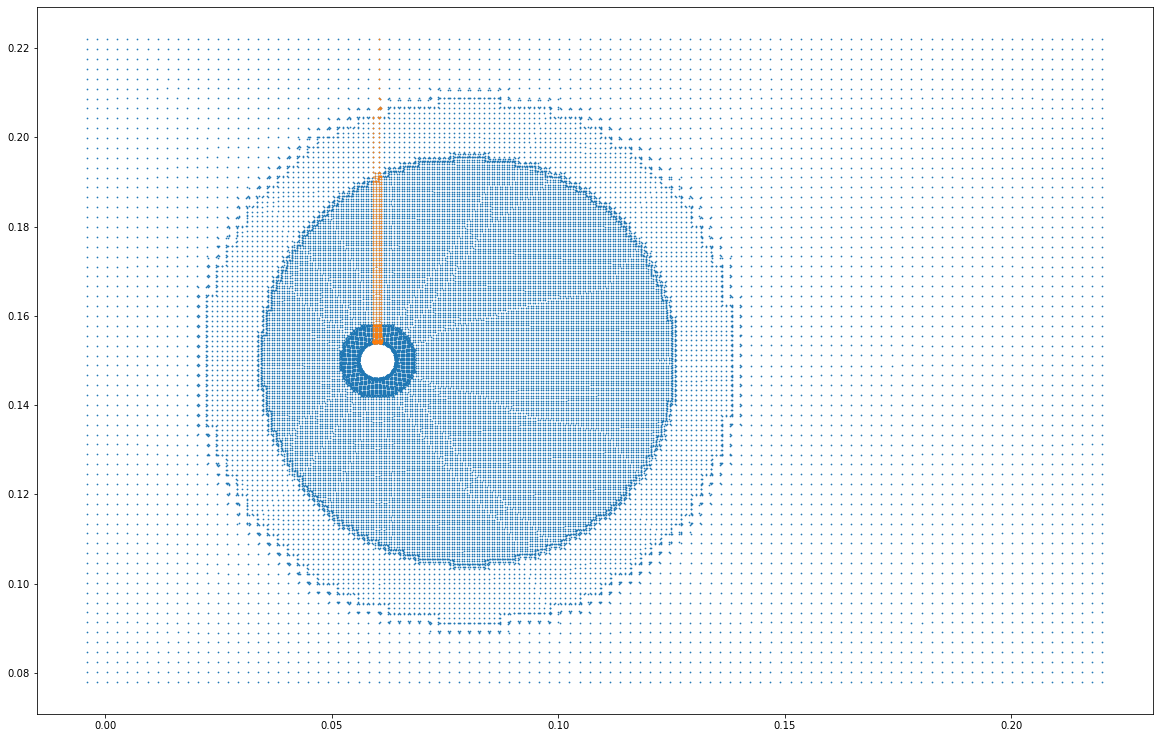

In [3]:
plt.figure(num=1,figsize=(20,13))
plt.scatter(x, y, s=0.5)
index = np.logical_and(0.059<x, x<0.061)
index = np.logical_and(index, y>0.15)
print("Number of elements in the grid area: ", index.sum())
plt.scatter(x[index], y[index], s=0.5)
plt.show()

**1.4) For each point in the smaller sub-grid you just selected, calculate the distance to its nearest neighbor.**

This can be done, e.g., by calculating the distance from all points to all other points and then looking for the minimum value (but larger than 0!) for each point.

  * Sort the distances in ascending order.
  * Provide a plot with just an index on the $x$-axis and the respective minimum distances on the logarithmically scaled $y$-axis.

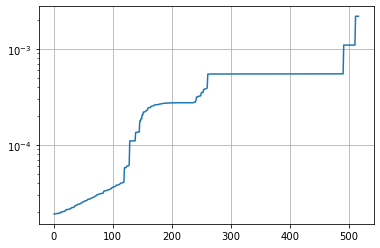

In [79]:
def distance (x1,y1,x2,y2):
    return ((y2-y1)**2+(x2-x1)**2)**0.5
min_dist=[]

for i1,j1 in zip(x[index],y[index]):
    dist=[]
    for i2,j2 in zip(x[index],y[index]):
        if(i1!=i2 or j1!=j2):
            dist.append(distance(i1,j1,i2,j2))
    min_dist.append(min(dist))

min_dist.sort()

plt.plot(range(1,517), np.array(min_dist))
plt.yscale('log')
plt.grid(True)
plt.show()

## 2. Flow speeds

Now let's look at the speeds that are present in the data set.

**2.1) For a general overview, provide [histograms](https://en.wikipedia.org/wiki/Histogram) of the three speed components.**

  * You can use matplotlib's [_hist()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html) function for this.
  * Plot the graphs side-by-side (3 plots in one row).
  * For each plot, use 100 equal-width bins.
  * What is the maximum speed in $x$ direction?

The maximum speed in 𝑥 direction is 52.5598


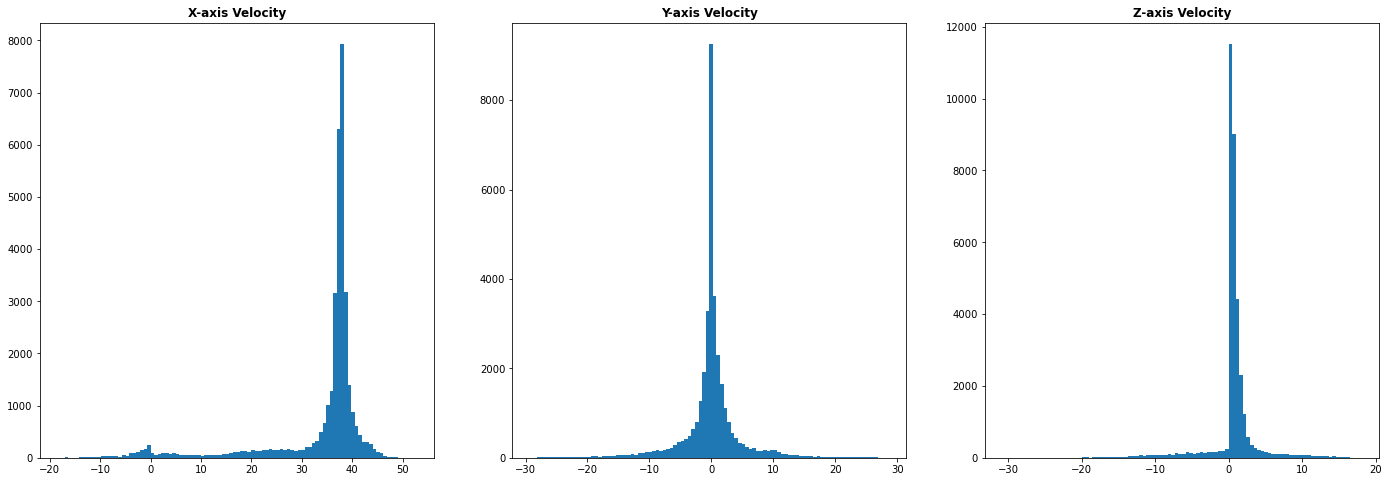

In [53]:
import matplotlib.pyplot as plt

plt.figure(3,(24,8))

plt.subplot(1,3,1)
plt.hist(u,bins=100)
plt.title('X-axis Velocity',fontweight ="bold")

plt.subplot(1,3,2)
plt.hist(v,bins=100)
plt.title('Y-axis Velocity',fontweight ="bold")

plt.subplot(1,3,3)
plt.hist(w,bins=100)
plt.title('Z-axis Velocity',fontweight ="bold")

print("The maximum speed in 𝑥 direction is",np.max(u))
plt.show()

**2.2) Visualize the flow testing different plot variants.**

  * Calculate the magnitude of the flow speeds (lengths of the velocity vectors at the grid points).
  * Generate 3 visualization of these magnitudes:
      1. using the [_scatter()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.scatter.html) function a color-representation of the values.
      2. using the [_tricontourf()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.tricontourf.html) function with 8, 32, and 256 levels (this is the one exception where using a loop would actually be efficient).
  * Make sure that the cylinder circle is represented in white.
  * Add a [colorbar](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.colorbar.html) so that the colors can be attributed to speeds.

<ipython-input-6-ce204e424963>:6: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  plt.subplot(4,1,1)


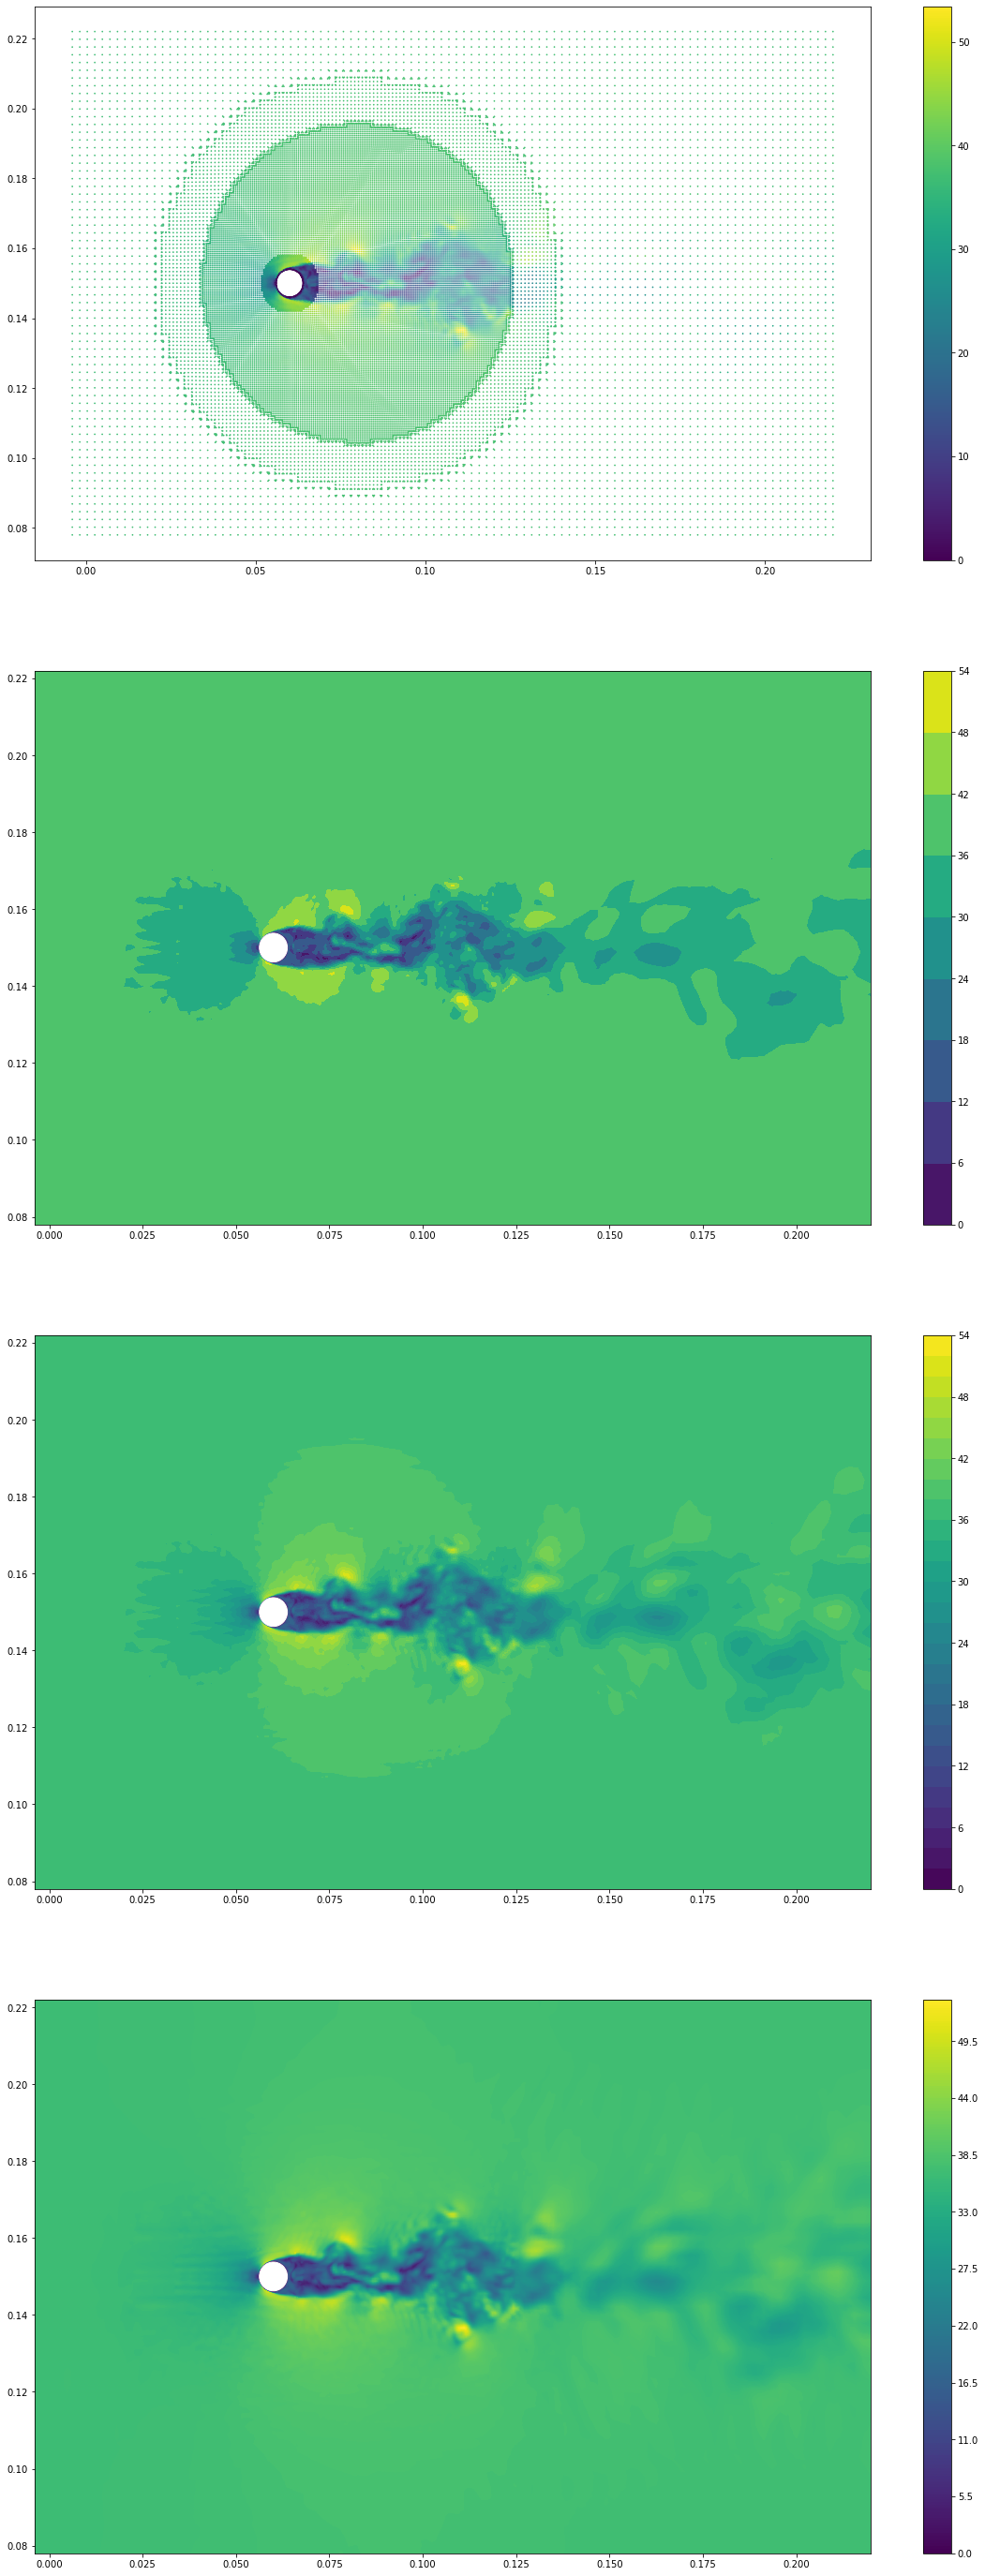

In [6]:
plt.figure(1,(20,50))
plt.subplot(411)

magn=np.array([((i*i)+(j*j)+(k*k))**0.5 for i,j,k in zip(u,v,w)])

plt.subplot(4,1,1)

plt.scatter(x, y, s=0.5, c=magn)
plt.colorbar()
i=0
for lev in [8, 32, 256]:
    plt.subplot(4,1,2+i)
    plt.tricontourf(x, y, magn, levels=lev)
    x_center=0.06
    y_center=0.15
    radius=7.5/2000
    plt.gca().add_patch(Circle((x_center, y_center), radius, color='white'))
    i+=1
    plt.colorbar()

plt.show()

## 3. Vorticity

To identify "interesting" regions in a flow field, often the [vorticity](https://en.wikipedia.org/wiki/Vorticity) is used, which we now want to calculate.
We shall content ourselves with the calculation in 2D, i.e. the vorticity in the $z$-direction. This is defined as follows:

$$
    \omega_z = \frac{\partial v}{\partial x} - \frac{\partial u}{\partial y}
$$

Apparently, we need the partial derivatives of the speeds. 
These were not given in the data file, thus we have to calculate them ourselves.
As we only have discrete values, we will have to calculate the derivative via the [difference quotient](https://en.wikipedia.org/wiki/Difference_quotient).
This would be much easier if we had the data on a regular rectangular grid.

Luckily for us, the SciPy module has a function that can map irregular data on a regular grid, namely [_griddata()_](https://docs.scipy.org/doc/scipy/reference/generated/scipy.interpolate.griddata.html).
And for generating a regularly-spaced grid, we could, for example, use NumPy's [_meshgrid()_](https://numpy.org/doc/stable/reference/generated/numpy.meshgrid.html)
together with [_arange()_](https://numpy.org/doc/stable/reference/generated/numpy.arange.html).

**3.1) Generate a regularly-spaced grid and interpolate the irregular-spaced velocity data onto that grid.**

  * The new grid should have a step-size of $10^{-4}\,$m (both in $x$ and $y$ direction) and encompass the simulation area.
  * Do the interpolation for $u$,$v$, and $w$ separately so you get three new (large) arrays.
  * To check whether this worked correctly, do a visualization of the magnitude of the new vectors using [_imshow()_](https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.imshow.html).
      * Set the `vmax` parameter to a sensible value.
      * Change the parameter `extent` to the physical extent of the grid.
      * Again, draw a white circle onto the plot at the adequate position.
  

_Note: If you're not sure about you computer's capabilities, start with a smaller stepsize._

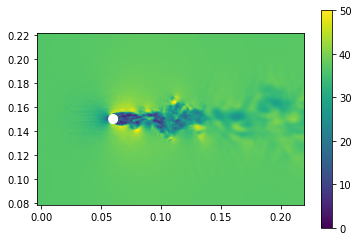

In [77]:
from scipy.interpolate import griddata # suggestion for interpolation method for smooth-looking result: "cubic"
step=0.0001
x1=np.arange(min(x), max(x), step)
y1=np.arange(min(y), max(y), step)
gx, gy = np.meshgrid(x1,y1)

iu=griddata((x,y), u, (gx,gy), method='cubic')
iv=griddata((x,y), v, (gx,gy), method='cubic')
iw=griddata((x,y), w, (gx,gy), method='cubic')

imagn=np.array([((i*i)+(j*j)+(k*k))**0.5 for i,j,k in zip(iu,iv,iw)])
x_center=0.06
y_center=0.15
radius=7.5/2000
plt.gca().add_patch(Circle((x_center, y_center), radius, color='white'))
plt.imshow(imagn,vmax=50, extent=(min(x),max(x),min(y),max(y)))
plt.colorbar()
plt.show()

Now that we have our data on a regular grid, we can easily approximate the derivatives just by

$$
    \frac{\partial v_{i,j}}{\partial x} = \frac{v_{i,j+1}-v_{i,j}}{\Delta x}
$$

and

$$
    \frac{\partial u_{i,j}}{\partial y} = \frac{u_{i+1,j}-u_{i,j}}{\Delta y}
$$

with $i=0\ldots N_\text{rows}-1$ and $j=0\ldots N_\text{columns}-1$.

**3.2) Calculate the derivatives and the vorticity according to the above equations. Visualize the vorticity using _imshow()_.**

  * Select a diverging [colormap](https://matplotlib.org/stable/tutorials/colors/colormaps.html) and make sure that the value 0 is represented as white.
  * Again, draw the white circle.
  * Set the displayed data range so that the plot is informative.
  * Add a colorbar.

_Note: Try and write efficient code! This calculation shouldn't take too long (a couple of seconds maybe). For testing, decrease the stepsize if necessary._

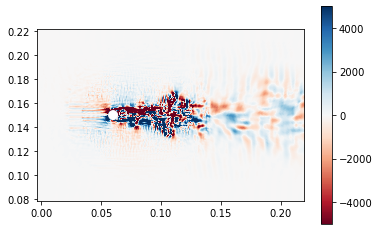

In [78]:
uy=(iu[:-1,:]-iu[1:,:])/step
ux=(iv[:,1:]-iv[:,:-1])/step
vorticity=ux[1:,:]-uy[:,1:]
#plt.hist(vorticity,bins=100, range=[-5000, 5000])
plt.gca().add_patch(Circle((x_center, y_center), radius, color='white'))
plt.imshow(vorticity, vmin=-5000, vmax=5000, extent=(min(x),max(x),min(y),max(y)), cmap='RdBu')
plt.colorbar()
plt.show()